In [42]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
connection_string = 'sqlite:///hawaii.sqlite'
engine = create_engine(connection_string)

In [44]:
Base = automap_base()

In [45]:
Base.prepare(engine, reflect=True)

In [46]:
Base.classes.keys()

['hawaii_data']

In [47]:
Hawaii = Base.classes.hawaii_data

In [48]:
session = Session(engine)

In [49]:
first_row = session.query(Hawaii).first()

In [50]:
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2185a975ac8>,
 'date_format': datetime.datetime(2010, 1, 1, 0, 0),
 'day': 1,
 'elevation': 3,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'month': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65,
 'year': 2010}

In [51]:
inspector = inspect(engine)
columns = inspector.get_columns('hawaii_data')
for each in columns:
    print(each['name'], each['type'])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation INTEGER
prcp FLOAT
tobs INTEGER
month INTEGER
day INTEGER
year INTEGER
date_format DATETIME


In [52]:
inspector.get_table_names()

['hawaii_data']

In [53]:
inspector.get_primary_keys('hawaii_data')

C:\Users\hakob\Anaconda3\envs\pydata\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: Call to deprecated method get_primary_keys.  Use get_pk_constraint instead.
  """Entry point for launching an IPython kernel.


['id']

In [54]:
conn = engine.connect()

In [55]:
query = """
        select * 
        from hawaii_data 
        WHERE (date_format BETWEEN '2016-08-23 00:00:00.000000' AND '2017-08-23 00:00:00.000000')
        """

In [56]:
df_12 = pd.read_sql(query, conn)

In [57]:
df_12.shape

(2230, 12)

In [58]:
df_12.head()

,id,station,name,latitude,longitude,elevation,prcp,tobs,month,day,year,date_format
0,2364,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,81,8,23,2016,2016-08-23 00:00:00.000000
1,2365,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,79,8,24,2016,2016-08-24 00:00:00.000000
2,2366,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,80,8,25,2016,2016-08-25 00:00:00.000000
3,2367,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,79,8,26,2016,2016-08-26 00:00:00.000000
4,2368,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,77,8,27,2016,2016-08-27 00:00:00.000000


In [59]:
df_12_gb = df_12[['date_format', 'prcp']].groupby('date_format', as_index=False).sum()
df_12_gb.head()

,date_format,prcp
0,2016-08-23 00:00:00.000000,2.757846
1,2016-08-24 00:00:00.000000,9.377846
2,2016-08-25 00:00:00.000000,0.540000
3,2016-08-26 00:00:00.000000,0.100000
4,2016-08-27 00:00:00.000000,0.763960


In [60]:
df_12_gb.tail()

,date_format,prcp
361,2017-08-19 00:00:00.000000,0.189643
362,2017-08-20 00:00:00.000000,0.453960
363,2017-08-21 00:00:00.000000,0.679643
364,2017-08-22 00:00:00.000000,0.500000
365,2017-08-23 00:00:00.000000,0.530000


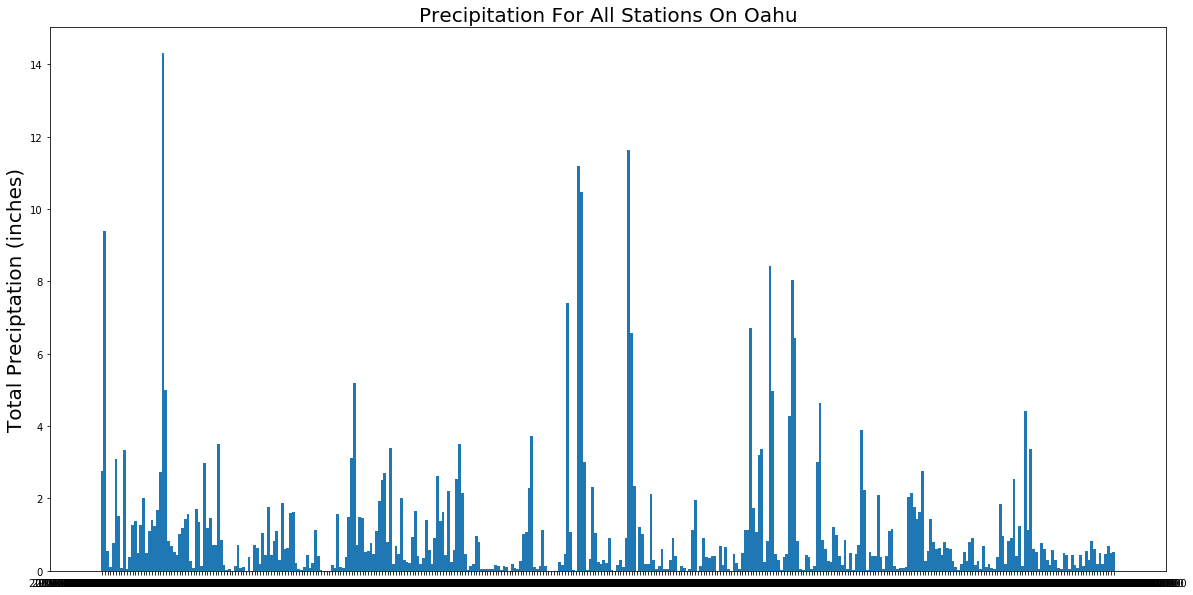

In [61]:
plt.figure(figsize = (20, 10))
width = 1
plt.bar(df_12_gb['date_format'], df_12_gb['prcp'], width=width)
plt.ylabel('Total Preciptation (inches)', fontsize = 20)
plt.title('Precipitation For All Stations On Oahu', fontsize = 20)
plt.show()

In [62]:
query = """
        select DISTINCT name 
        from hawaii_data
        """

In [63]:
df_station_name = pd.read_sql(query, conn)
df_station_name

,name
0,"WAIKIKI 717.2, HI US"
1,"KANEOHE 838.1, HI US"
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,"PEARL CITY, HI US"
4,"UPPER WAHIAWA 874.3, HI US"
5,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,"WAIHEE 837.5, HI US"
7,"HONOLULU OBSERVATORY 702.2, HI US"
8,"MANOA LYON ARBO 785.2, HI US"


In [64]:
query = """
        SELECT name, tobs 
        FROM hawaii_data
        """

In [65]:
df_active = pd.read_sql(query, conn)
df_active.columns.tolist()

['name', 'tobs']

In [66]:
df_active_gb = df_active[['name', 'tobs']].groupby('name', as_index=False).count()

In [67]:
df_active_gb_sort = df_active_gb.sort_values(by='tobs', ascending=False).reset_index(drop=True)
df_active_gb_sort

,name,tobs
0,"WAIHEE 837.5, HI US",2772
1,"WAIKIKI 717.2, HI US",2724
2,"KANEOHE 838.1, HI US",2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,"MANOA LYON ARBO 785.2, HI US",2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,"PEARL CITY, HI US",1372
8,"UPPER WAHIAWA 874.3, HI US",511


In [68]:
query = """
        SELECT date_format, name, tobs 
        FROM hawaii_data
        WHERE (date_format BETWEEN '2016-08-23 00:00:00.000000' AND '2017-08-23 00:00:00.000000') AND name LIKE '%WAIHEE%'
        """

In [69]:
temp_df = pd.read_sql(query, conn)
temp_df.head()

,date_format,name,tobs
0,2016-08-23 00:00:00.000000,"WAIHEE 837.5, HI US",77
1,2016-08-24 00:00:00.000000,"WAIHEE 837.5, HI US",77
2,2016-08-25 00:00:00.000000,"WAIHEE 837.5, HI US",80
3,2016-08-26 00:00:00.000000,"WAIHEE 837.5, HI US",80
4,2016-08-27 00:00:00.000000,"WAIHEE 837.5, HI US",75


In [70]:
temp_df.tail()

,date_format,name,tobs
347,2017-08-14 00:00:00.000000,"WAIHEE 837.5, HI US",77
348,2017-08-15 00:00:00.000000,"WAIHEE 837.5, HI US",77
349,2017-08-16 00:00:00.000000,"WAIHEE 837.5, HI US",76
350,2017-08-17 00:00:00.000000,"WAIHEE 837.5, HI US",76
351,2017-08-18 00:00:00.000000,"WAIHEE 837.5, HI US",79


In [71]:
df_temp_gb = temp_df[['name', 'tobs']].groupby('tobs', as_index=False).count()
df_temp_gb.head()

,tobs,name
0,59,3
1,60,2
2,61,1
3,62,6
4,63,4


In [72]:
df_temp_gb.tail()

,tobs,name
20,79,18
21,80,11
22,81,4
23,82,3
24,83,1


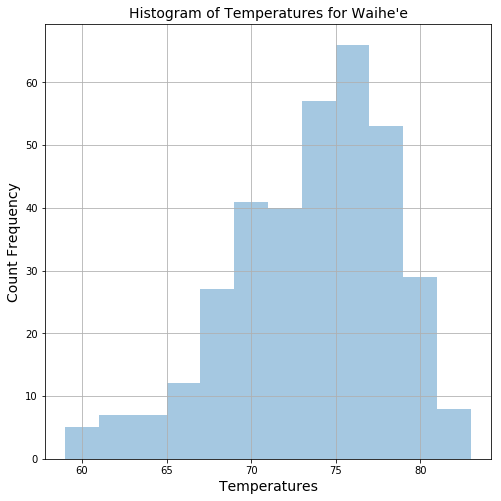

In [73]:
plt.figure(figsize = (8, 8))
sns.distplot(temp_df['tobs'], bins=12, kde=False)
plt.xlabel('Temperatures', fontsize = 14)
plt.ylabel('Count Frequency', fontsize = 14)
plt.title('Histogram of Temperatures for Waihe\'e', fontsize =14)
plt.grid(True)
plt.show()


In [74]:
#Temp 
inspector = inspect(engine)
columns = inspector.get_columns('hawaii_data')
for each in columns:
    print(each['name'], each['type'])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation INTEGER
prcp FLOAT
tobs INTEGER
month INTEGER
day INTEGER
year INTEGER
date_format DATETIME


In [75]:
def get_temp(early_date_str, late_date_str):
    early_date_dt = datetime.strptime(early_date_str, '%Y-%m-%d')
    late_date_dt = datetime.strptime(late_date_str, '%Y-%m-%d')
    early_date = early_date_dt + timedelta(days=-365)
    late_date = late_date_dt + timedelta(days=-365)
    query = 'SELECT date_format, tobs FROM hawaii_data WHERE (date_format BETWEEN ' + '\"' + str(early_date) + '\"' ' AND ' + '\"' + str(late_date) + '\"' + ')'
    df_temp = pd.read_sql(query, conn)
    ave_temp = df_temp['tobs'].mean()
    max_temp = df_temp['tobs'].max()
    min_temp = df_temp['tobs'].min()
    delta_temp = max_temp - min_temp
    return ave_temp, max_temp, min_temp, delta_temp

    #Take string and convert to datetime.
    #Use datetime operations to subtract one year from the dates and store as strings.
    #Take new strings and insert back into query expression.
    #Continue as normal.
    
    #https://stackoverflow.com/questions/441147/how-can-i-subtract-a-day-from-a-python-date
    #https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
    #https://stackoverflow.com/questions/466345/converting-string-into-datetime

In [76]:
ave_temp, max_temp, min_temp, delta_temp = get_temp('2017-08-01', '2017-08-12')
print('The ave temp is (F): ', ave_temp)
print('The max temp is (F): ', max_temp)
print('The min temp is (F): ', min_temp)
print('The delta in temp is (F): ', delta_temp)

The ave temp is (F):  78.36111111111111
The max temp is (F):  83
The min temp is (F):  72
The delta in temp is (F):  11


In [77]:
city = ["Oahu"]
ave_temperature = [ave_temp]
x_axis = np.arange(len(ave_temperature))

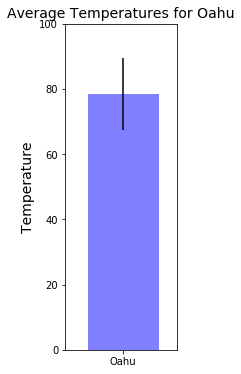

In [78]:
plt.figure(figsize = (2, 6))
plt.bar(x_axis, ave_temperature, yerr = delta_temp, color="b", alpha = 0.5, align="edge") 
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, city)
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, 100, 5)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Average Temperatures for Oahu', fontsize = 14)
plt.show()